## AI Foundation - Part 2

In [1]:
%matplotlib inline

In [15]:
simple_map = {
    'BJ': ['WH', 'NJ'],
    'NJ': ['GZ', 'BJ'],
    'GZ': ['WH', 'NJ'],
    'XA': ['GZ', 'WH'],
    'WH': ['GZ', 'XA']
}

# simple_map = {
#     'BJ': ['WH', 'NJ'],
#     'NJ': ['GZ', 'BJ'],
#     'GZ': ['WH', 'NJ'],
#     'XA': ['GZ', 'WH'],
#     'WH': ['GZ', '西安']
# }

In [7]:
import networkx as nx

In [8]:
graph = nx.Graph(simple_map)

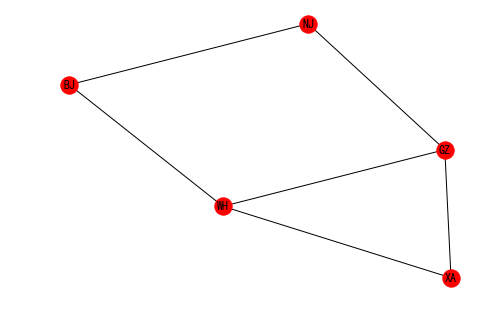

In [14]:
nx.draw(graph, with_labels=True, fonts=40)

In [27]:
def search(start_point, desitination, connection: dict):
    
    seen = set() # 集合
    
    need_to_check = [start_point]
        
    while need_to_check:
        froniter = need_to_check.pop(0)
        
        print('now I am checking the : {}'.format(froniter))
        
        if froniter in seen: continue
            
        adjacents = connection[froniter]
        
        print('{} has adjacents: {}'.format(froniter, adjacents))

        for city in adjacents:
            if city == desitination: print('## find {} ## '.format(city))            
            else:
                need_to_check.append(city)
                
        seen.add(froniter)

In [28]:
search('BJ', 'XA', simple_map) 

now I am checking the : BJ
BJ has adjacents: ['WH', 'NJ']
now I am checking the : WH
WH has adjacents: ['GZ', 'XA']
## find XA ## 
now I am checking the : NJ
NJ has adjacents: ['GZ', 'BJ']
now I am checking the : GZ
GZ has adjacents: ['WH', 'NJ']
now I am checking the : GZ
now I am checking the : BJ
now I am checking the : WH
now I am checking the : NJ


## 输入了一个开始节点和一个地图信息，然后我就开始一个一个城市的依据链接关系进行扩展，后来就找到了最终的终点。

## 稍微加几句，你就变成一个 “高德导航了”， 思考：怎么样，把具体的链接路径 记录下来呢？ 

## Dynamic Programming

In [73]:
prices = [1, 5, 8, 9, 10, 17, 17, 20, 24, 25]

In [74]:
assert len(prices) == 10

In [75]:
from collections import defaultdict

In [76]:
length_and_price = defaultdict(int)

In [77]:
for i, p in enumerate(prices):
    length_and_price[i + 1] = p

#length_and_price = {
#    i + 1 : p for i, p in enumerate(prices)
#}

In [78]:
length_and_price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 25})

In [79]:
length_and_price[18]

0

In [86]:
from functools import lru_cache

In [95]:
solution = {}

@lru_cache(maxsize=2**10)
def optimal(n):
    # function: r, able to get the optimal price of length: n
    #[(0, n), (1, n - 1), (2, n-2), (3, n-3), .. (n-1, 1)]
    
    candidates = [(left, n - left) for left in range(1, n)]    
    
    ps = [(l, r, optimal(l) + optimal(r)) for l, r in candidates] + [(n, 0, length_and_price[n])]
    
    best_cut_left, best_cut_right, optimal_price = max(ps, key=lambda x: x[2])
    
    solution[n] = (best_cut_left, best_cut_right)
    
    return optimal_price

In [81]:
optimal(8)

22

In [94]:
%%time
optimal(13)

CPU times: user 1.11 s, sys: 14.4 ms, total: 1.13 s
Wall time: 1.14 s


35

In [ ]:
1s = 1000ms 
1ms == 1000us 

In [96]:
%%time
optimal(13)

CPU times: user 103 µs, sys: 1 µs, total: 104 µs
Wall time: 110 µs


35

In [97]:
optimal(111)

314